## SETUP AND LOAD DATA

In [1]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

### Remove dodgy Images

In [3]:
import cv2
import imghdr

C:\Users\Kemci\AppData\Local\Temp\ipykernel_16576\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = 'CarsBikesSet'

In [5]:
os.listdir(data_dir)

['Bikes', 'Cars']

In [6]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print (image)

12-Dream-blue1.jpg
27.5inch-Plus-E-Bike-2.jpg
500x500-mtb-may.jpg
5a2013200c45d5801c5a0735b135a02322-kids-bike-044-final.1x.rsquare.w1400.jpg
7E1759A8-0991-431E-B08D-E5898C66D7B1.png
AF2bZyiXs-oekDbPIVZxupVxJ46kCiFBZBiCpdZtOrF4UACocfcs64-c-mo.jpg
best-gravel-bikes-lead-cnnu.jpg
bike-2.png
blacks-bikes-xz507bz18-64_600.jpg
blues-bikes-byy412-2-64_600.jpg
blues-bikes-hp-27-b-64_600.jpg
BMW-website-600x360-S-1000-RR.jpg.asset.1686660374063.jpg
category-xc.jpg
Cat_Bike_Banner_3.png
Element-Spokes-Green.jpg
evil-bike-banner-insurgent_985ee63c-26b5-4b09-a59b-9da97671bd60.jpg
exp2024-2c.jpg
greens-bikes-jinxbike21-64_600.jpg
hayabusa-right-side-view_360x240.jpg
hello-dave-gx-P1.jpg
Honda_electric_motorcycles_1682760893792_1683521595769.jpg
hunter-350-right-front-three-quarter.jpeg
image.jpeg
image10.jpeg
image11.jpeg
image12.jpeg
image13.jpeg
image14.jpeg
image15.jpeg
image16.jpeg
image17.jpeg
image18.jpeg
image19.jpeg
image2.jpeg
image20.jpeg
image21.jpeg
image22.jpeg
image23.jpeg
image24.jp

In [9]:
img = cv2.imread(os.path.join('CarsBikesSet', 'Cars', 'bugatti-chiron-sport-mid-engined-w16-engine-exclusive-news-photo-1600704674.jpg'))
print(img)

[[[  4   6   7]
  [  6   8   9]
  [  4   6   7]
  ...
  [ 16  58 100]
  [  7  36  63]
  [  0   7  25]]

 [[  3   5   6]
  [  4   6   7]
  [  2   4   5]
  ...
  [ 15  57  99]
  [  7  36  63]
  [  0   6  24]]

 [[  3   5   6]
  [  2   4   5]
  [  0   2   3]
  ...
  [ 13  57  98]
  [  5  34  61]
  [  0   6  24]]

 ...

 [[ 80 109 130]
  [ 81 108 128]
  [ 85 110 130]
  ...
  [136 161 177]
  [137 162 178]
  [137 162 178]]

 [[ 78 106 130]
  [ 76 105 126]
  [ 79 106 127]
  ...
  [136 161 177]
  [137 162 178]
  [137 162 178]]

 [[ 74 104 129]
  [ 73 104 127]
  [ 77 104 125]
  ...
  [136 161 177]
  [137 162 178]
  [137 162 178]]]


In [10]:
img.shape

(683, 1024, 3)

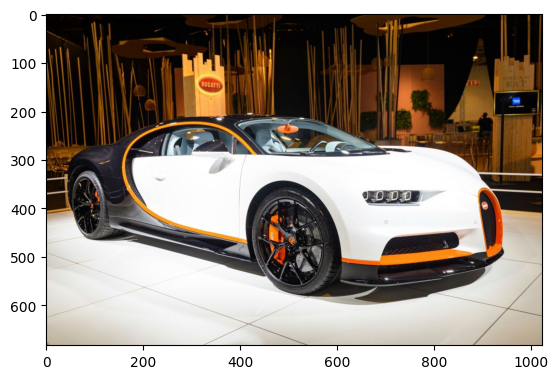

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
            print("Image not in ext list {}".format(image_path))
            os.remove(image_path)
    except Exception as e:
        print("Issue with image {}".format(image_path))

#### Load Data

In [13]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('CarsBikesSet')

Found 1128 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000002AAABED0470>)

In [18]:
# Get another batch from the iterator
batch = data_iterator.next()

In [19]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [20]:
# Class 0 = CATS
# Class 1 = DOGS
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

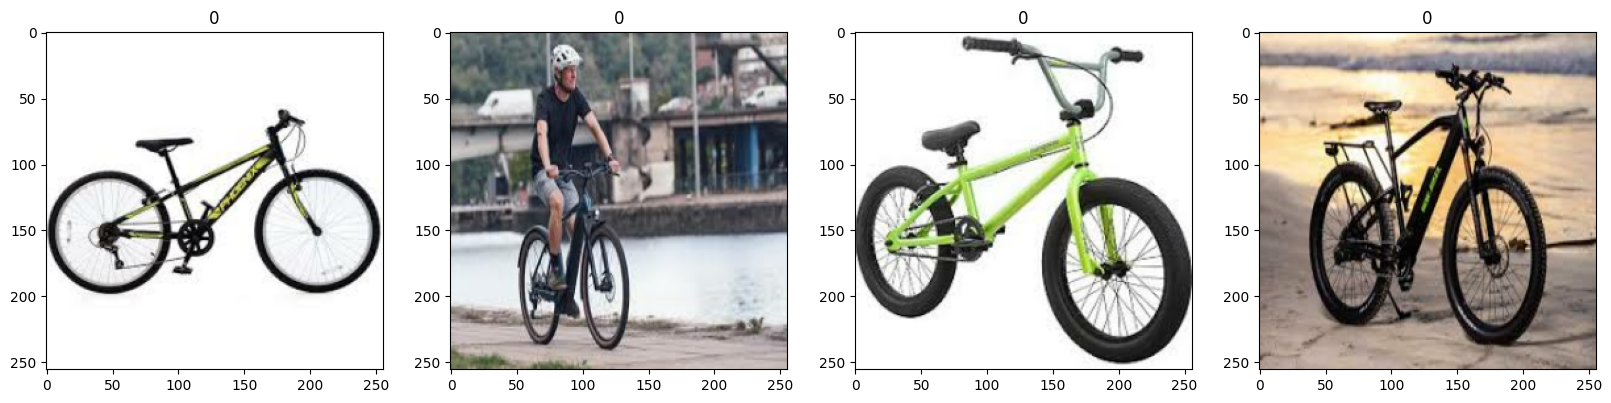

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## PREPROCESS DATA

### Scale Data

In [22]:
data = data.map(lambda x,y: (x/255, y))

In [23]:
scaled_iterator = data.as_numpy_iterator()

In [24]:
batch = scaled_iterator.next()

In [25]:
batch[0].max()

1.0

### Split Data

In [26]:
len(data_dir)

12

In [27]:
train_size = int(len(data_dir)*.7)
val_size = int(len(data_dir)*.2)+1
test_size = int(len(data_dir)*.1)+1

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## DEEP MODEL

### Build Deep Learning Model

In [29]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16,(3,3),1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

c:\Users\Kemci\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [32]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### Train

In [34]:
logdir = "logs3.0"

In [35]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [36]:
history = model.fit(train, epochs = 200, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5536 - loss: 1.0309 - val_accuracy: 0.5417 - val_loss: 0.6460
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5669 - loss: 0.6689 - val_accuracy: 0.6667 - val_loss: 0.6210
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7276 - loss: 0.5746 - val_accuracy: 0.7604 - val_loss: 0.4053
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 910ms/step - accuracy: 0.8358 - loss: 0.3798 - val_accuracy: 0.8021 - val_loss: 0.3923
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 967ms/step - accuracy: 0.8462 - loss: 0.3464 - val_accuracy: 0.9375 - val_loss: 0.2517
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9234 - loss: 0.2320 - val_accuracy: 0.7917 - val_loss: 0.3380
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 924ms/step - accuracy: 0.8714 - loss: 0.2742 - val_accuracy: 0.9479 - val_loss: 0.1951
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9691 - loss: 0.1626 - val_accuracy: 0.9479 - val_loss: 0.

In [37]:
history.history

{'accuracy': [0.53515625,
  0.65234375,
  0.73828125,
  0.859375,
  0.859375,
  0.90234375,
  0.88671875,
  0.96484375,
  0.96484375,
  0.9765625,
  0.9765625,
  0.9765625,
  0.98046875,
  0.9921875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.99609375,
  0.99609375,
  0.99609375,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  

### Plot Performance

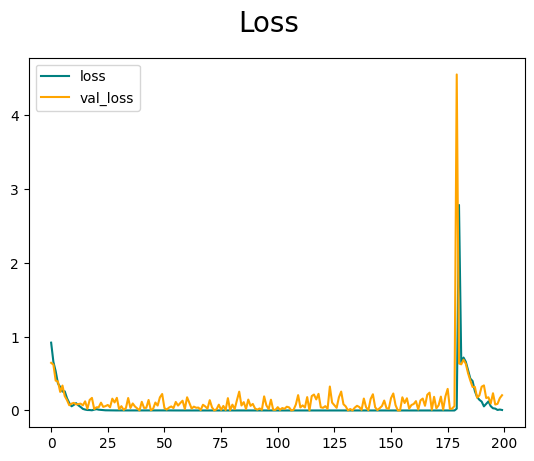

In [38]:
fig = plt.figure()
plt.plot(history.history["loss"], color = "teal", label = "loss")
plt.plot(history.history["val_loss"], color = "orange", label = "val_loss")
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

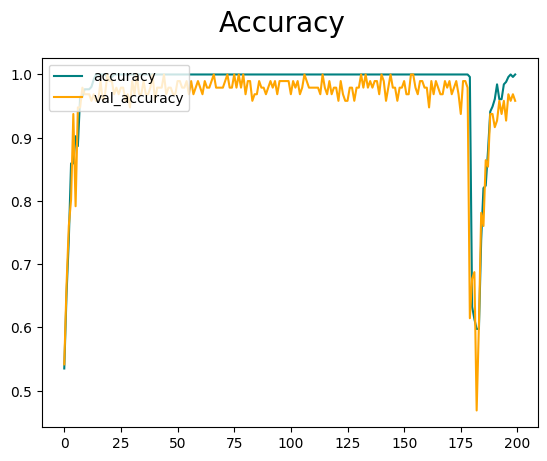

In [39]:
fig = plt.figure()
plt.plot(history.history["accuracy"], color = "teal", label = "accuracy")
plt.plot(history.history["val_accuracy"], color = "orange", label = "val_accuracy")
fig.suptitle("Accuracy", fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

## EVALUATE PERFORMANCE

### Evaluate

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [42]:
len(batch)

2

In [43]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


In [44]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.8709677457809448, Recall:1.0, Accuracy:0.9375


In [45]:
# print(pre.result(), re.result(), acc.result())

### Test

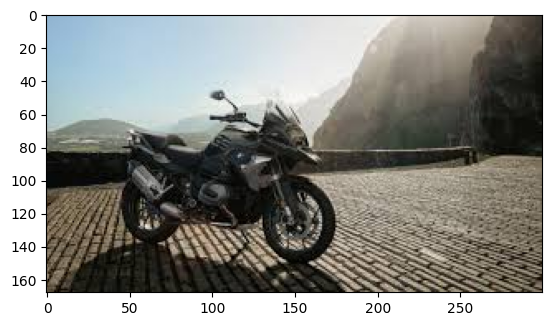

In [46]:
img = cv2.imread('biketest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

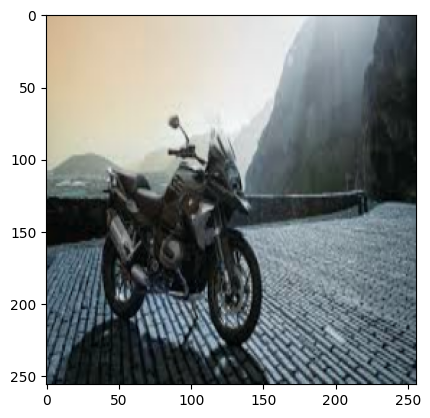

In [47]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
resize.shape

TensorShape([256, 256, 3])

In [49]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


In [51]:
yhat

array([[0.3260581]], dtype=float32)

In [52]:
if yhat > 0.5:
    print (f"Predicted class is Car")
else:
    print (f"Predicted class is Bike")

Predicted class is Bike


## SAVE

In [53]:
from tensorflow.keras.models import load_model

In [54]:
model.save(os.path.join('models', 'cars&bikesmodel.h5'))

In [55]:
new_model = load_model(os.path.join('models', 'cars&bikesmodel.h5'))

In [56]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


In [57]:
if yhatnew > 0.5:
   print (f"Predicted class is Car")
else:
   print (f"Predicted class is Bike")

Predicted class is Bike
